# Install and Import Dependencies

In [1]:
# Install necessary packages
!pip install kaggle
!pip install tensorflow
!pip install tensorflow-gpu
!pip install tensorflow-io
!pip install matplotlib

# Setup Kaggle API
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import kagglehub
from tensorflow.keras import layers, models  # Add this import statement
import numpy as np



# Download datasets
dataset1_path = kagglehub.dataset_download("mmoreaux/audio-cats-and-dogs")
dataset2_path = kagglehub.dataset_download("luisblanche/birdcall-singing-3")

# Print dataset paths
print("Path to dataset 1 files:", dataset1_path)
print("Path to dataset 2 files:", dataset2_path)

# List all files in the directories
print("Files in dataset 1:", os.listdir(dataset1_path))
print("Files in dataset 2:", os.listdir(dataset2_path))
print("Files in dataset 1 test folder:", os.listdir(os.path.join(dataset1_path, 'cats_dogs', 'test')))

# Define paths for bird and animal sounds
BIRD1 = os.path.join(dataset2_path, 'osprey')
BIRD2 = os.path.join(dataset2_path, 'norcar')
BIRD3 = os.path.join(dataset2_path, 'ruckin')
BIRD4 = os.path.join(dataset2_path, 'pasfly')
BIRD5 = os.path.join(dataset2_path, 'rewbla')
BIRD6 = os.path.join(dataset2_path, 'rebwoo')
CAT = os.path.join(dataset1_path, 'cats_dogs')
DOG = os.path.join(dataset1_path, 'cats_dogs')

# Create TensorFlow datasets
bird1 = tf.data.Dataset.list_files(BIRD1 + '/*.wav')
bird2 = tf.data.Dataset.list_files(BIRD2 + '/*.wav')
bird3 = tf.data.Dataset.list_files(BIRD3 + '/*.wav')
bird4 = tf.data.Dataset.list_files(BIRD4 + '/*.wav')
bird5 = tf.data.Dataset.list_files(BIRD5 + '/*.wav')
bird6 = tf.data.Dataset.list_files(BIRD6 + '/*.wav')
cat = tf.data.Dataset.list_files(CAT + '/cat_*.wav')
dog = tf.data.Dataset.list_files(DOG + '/dog_barking_*.wav')

# Label the datasets
bird1_labeled_data = tf.data.Dataset.zip((bird1, tf.data.Dataset.from_tensor_slices(tf.ones(len(bird1)) * 0)))  # Label: 0
bird2_labeled_data = tf.data.Dataset.zip((bird2, tf.data.Dataset.from_tensor_slices(tf.ones(len(bird2)) * 1)))  # Label: 1
bird3_labeled_data = tf.data.Dataset.zip((bird3, tf.data.Dataset.from_tensor_slices(tf.ones(len(bird3)) * 2)))  # Label: 2
bird4_labeled_data = tf.data.Dataset.zip((bird4, tf.data.Dataset.from_tensor_slices(tf.ones(len(bird4)) * 3)))  # Label: 3
bird5_labeled_data = tf.data.Dataset.zip((bird5, tf.data.Dataset.from_tensor_slices(tf.ones(len(bird5)) * 4)))  # Label: 4
bird6_labeled_data = tf.data.Dataset.zip((bird6, tf.data.Dataset.from_tensor_slices(tf.ones(len(bird6)) * 5)))  # Label: 5
cat_labeled_data = tf.data.Dataset.zip((cat, tf.data.Dataset.from_tensor_slices(tf.ones(len(cat)) * 6)))  # Label: 6
dog_labeled_data = tf.data.Dataset.zip((dog, tf.data.Dataset.from_tensor_slices(tf.ones(len(dog)) * 7)))  # Label: 7

# Function to split datasets
def split_dataset(class_dataset, train_size_ratio=0.8):
    class_data_size = len(list(class_dataset))
    train_size = int(train_size_ratio * class_data_size)
    train_class_data = class_dataset.take(train_size)
    test_class_data = class_dataset.skip(train_size)
    return train_class_data, test_class_data

# Split datasets into training and testing sets
bird1_train, bird1_test = split_dataset(bird1_labeled_data)
bird2_train, bird2_test = split_dataset(bird2_labeled_data)
bird3_train, bird3_test = split_dataset(bird3_labeled_data)
bird4_train, bird4_test = split_dataset(bird4_labeled_data)
bird5_train, bird5_test = split_dataset(bird5_labeled_data)
bird6_train, bird6_test = split_dataset(bird6_labeled_data)
cat_train, cat_test = split_dataset(cat_labeled_data)
dog_train, dog_test = split_dataset(dog_labeled_data)

# Concatenate all training and testing datasets
train_data = bird1_train.concatenate(bird2_train).concatenate(bird3_train).concatenate(bird4_train) \
                      .concatenate(bird5_train).concatenate(bird6_train) \
                      .concatenate(cat_train).concatenate(dog_train)
test_data = bird1_test.concatenate(bird2_test).concatenate(bird3_test).concatenate(bird4_test) \
                      .concatenate(bird5_test).concatenate(bird6_test) \
                      .concatenate(cat_test).concatenate(dog_test)



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.2 MB/s eta 0:00:00
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


100%|██████████| 97.0M/97.0M [00:03<00:00, 26.1MB/s]

Extracting files...


100%|██████████| 7.43G/7.43G [04:24<00:00, 30.2MB/s]

Extracting files...


Path to dataset 1 files: /root/.cache/kagglehub/datasets/mmoreaux/audio-cats-and-dogs/versions/5
Path to dataset 2 files: /root/.cache/kagglehub/datasets/luisblanche/birdcall-singing-3/versions/1
Files in dataset 1: ['train_test_split.csv', 'cats_dogs', 'utils.py']
Files in dataset 2: ['rufgro', 'rusbla', 'pinjay', 'osprey', 'phaino', 'rocpig', 'olsfly', 'ruckin', 'rebwoo', 'prawar', 'ribgul', 'reevir1', 'nutwoo', 'perfal', 'norcar', 'pilwoo', 'rewbla', 'pygnut', 'pasfly', 'rebnut', 'rinduc', 'rthhum', 'purfin', 'pinsis', 'norsho', 'norpin', 'orcwar', 'pingro', 'nrwswa', 'norhar2', 'normoc', 'pecsan', 'norwat', 'redhea', 'rocwre', 'pinwar', 'palwar', 'rufhum', 'rudduc', 'ovenbi1', 'redcro', 'rebmer', 'rethaw', 'pibgre', 'norpar', 'rebsap', 'reshaw', 'plsvir', 'renpha', 'norfli', 'robgro']
Files in dataset 1 test folder: ['test', 'cats']


# Pre-Processing of Audio Data

In [2]:
import librosa

def load_wav_16k_mono(filename):

    # Load encoded wav file
    file_contents = tf.io.read_file(filename)

    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)

    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

    return wav

def preprocess(file_path, label):
    # Load and preprocess the audio file
    wav = load_wav_16k_mono(file_path)

    wav = wav[:56000]
    zero_padding = tf.zeros([56000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)

    # Convert the TensorFlow tensor to a NumPy array
    wav_np = wav.numpy()


   # Compute the MFCCs using librosa with specified frame length and frame step
    mfccs = librosa.feature.mfcc(y=wav_np, sr=16000, n_mfcc=13, n_fft=1024, hop_length=256)

    # Transpose the MFCCs to have the shape (time_frames, num_coefficients)
    mfccs = tf.convert_to_tensor(mfccs.T, dtype=tf.float32)


    # Add an extra dimension to get the desired shape [None, 13, 1]
    # mfccs = tf.expand_dims(mfccs, axis=-1)

    return mfccs, label

def preprocess_dataset_element(file_path, label):
    # Use tf.py_function to handle non-TensorFlow operations within a tf.data pipeline
    mfccs, label = tf.py_function(preprocess, [file_path, label], [tf.float32, tf.float32])
    # mfccs.set_shape([None, 13, 1])  # Set shape for consistency in the pipeline
    # mfccs.set_shape([None, 13])  # Set shape for consistency in the pipeline
    # label.set_shape([])  # Set shape for the label
    mfccs.set_shape([219, 13])  # Update with actual dimensions
    label.set_shape([])  # Set shape for the label
        # Reshape to add channel dimension
    mfccs = tf.expand_dims(mfccs, axis=-1) # Reshape to (219, 13, 1)
    return mfccs, label

# Assuming train_data and test_data are defined with (file_path, label) tuples
train_data = train_data.map(preprocess_dataset_element)
test_data = test_data.map(preprocess_dataset_element)

train_data = train_data.cache()
train_data = train_data.shuffle(buffer_size=1000)
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

test_data = test_data.cache()
test_data = test_data.shuffle(buffer_size=1000)
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Print sample shapes in train_data and test_data
for spectrogram, label in train_data.take(5):
    print(f"Train Data - Spectrogram shape: {spectrogram.shape}, Label: {label.numpy()}")
for spectrogram, label in test_data.take(5):
    print(f"Test Data - Spectrogram shape: {spectrogram.shape}, Label: {label.numpy()}")



Train Data - Spectrogram shape: (16, 219, 13, 1), Label: [3. 0. 2. 6. 2. 6. 1. 1. 4. 4. 7. 7. 5. 4. 2. 3.]
Train Data - Spectrogram shape: (16, 219, 13, 1), Label: [0. 3. 1. 2. 6. 3. 3. 6. 0. 5. 1. 4. 6. 4. 5. 2.]
Train Data - Spectrogram shape: (16, 219, 13, 1), Label: [1. 3. 0. 1. 6. 4. 5. 6. 3. 0. 6. 2. 3. 2. 3. 5.]
Train Data - Spectrogram shape: (16, 219, 13, 1), Label: [0. 2. 2. 7. 3. 5. 6. 1. 1. 6. 1. 0. 1. 3. 4. 0.]
Train Data - Spectrogram shape: (16, 219, 13, 1), Label: [4. 7. 4. 1. 6. 4. 6. 7. 7. 0. 0. 1. 7. 4. 3. 5.]
Test Data - Spectrogram shape: (16, 219, 13, 1), Label: [1. 0. 5. 1. 3. 4. 6. 3. 7. 3. 0. 7. 3. 3. 7. 1.]
Test Data - Spectrogram shape: (16, 219, 13, 1), Label: [6. 6. 4. 5. 7. 5. 1. 3. 6. 2. 6. 6. 2. 3. 1. 5.]
Test Data - Spectrogram shape: (16, 219, 13, 1), Label: [5. 2. 7. 7. 7. 6. 6. 4. 6. 2. 6. 2. 0. 1. 3. 7.]
Test Data - Spectrogram shape: (16, 219, 13, 1), Label: [5. 3. 4. 5. 2. 6. 4. 4. 6. 1. 4. 2. 4. 7. 6. 6.]
Test Data - Spectrogram shape: (16, 219, 

In [3]:
samples, labels = train_data.as_numpy_iterator().next()
samples.shape


(16, 219, 13, 1)

In [4]:
labels

array([0., 6., 5., 4., 2., 6., 3., 4., 6., 2., 4., 1., 0., 5., 3., 2.],
      dtype=float32)

# 1D CNN Model for Classification 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np


import tensorflow as tf
tf.config.experimental.enable_op_determinism()


import random
random.seed(42)


# Define the model architecture
def create_1d_cnn_model(): # Pass input_shape as an argument
    model = models.Sequential()

    # First Conv1D layer - Use the provided input_shape
    model.add(layers.Conv1D(filters=8, kernel_size=3, strides=1, activation='relu', input_shape=(219,13)))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Second Conv1D layer
    model.add(layers.Conv1D(filters=24, kernel_size=3, strides=1, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Third Conv1D layer
    model.add(layers.Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Fourth Conv1D layer
    model.add(layers.Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Flatten the output and add Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(176, activation='relu'))
    model.add(layers.Dense(24, activation='relu'))  # Fully connected layer
    model.add(layers.Dense(8, activation='softmax'))  # Output layer for 8 classes

    return model


# # Get the input shape from your data
# for features, labels in train_data.take(1):
#     input_shape = features.shape  # Get shape excluding batch size
#     print(input_shape)
#     break

# Instantiate and compile the model using the correct input shape
model = create_1d_cnn_model() # Pass input_shape to the model creation function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=250, validation_data=test_data)
# Print the model summary
model.summary()


Epoch 1/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1338 - loss: 4.4794 - val_accuracy: 0.1648 - val_loss: 2.0371
Epoch 2/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1698 - loss: 2.0270 - val_accuracy: 0.1591 - val_loss: 2.0327
Epoch 3/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1498 - loss: 1.9872 - val_accuracy: 0.2273 - val_loss: 1.9688
Epoch 4/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2351 - loss: 1.8826 - val_accuracy: 0.2045 - val_loss: 1.7973
Epoch 5/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2832 - loss: 1.7606 - val_accuracy: 0.3068 - val_loss: 1.7146
Epoch 6/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3281 - loss: 1.7489 - val_accuracy: 0.3125 - val_loss: 1.7244
Epoch 7/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3241 - loss: 1.6796 - val_accuracy: 0.3750 - val_loss: 1.6585
Epoch 8/250
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3693 - loss: 1.6070 - val_accuracy: 0.3807 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 217, 8)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 108, 8)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 106, 24)             │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 53, 24)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 51, 16)              │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 25, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 23, 16)              │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 11, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 176)                 │          31,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 24)                  │           4,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,418 (450.86 KB)

 Trainable params: 38,472 (150.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,946 (300.57 KB)

# Plots

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.9034090638160706
Final Training Loss: 8.21863523015054e-06
Final Validation Loss: 2.19516658782959


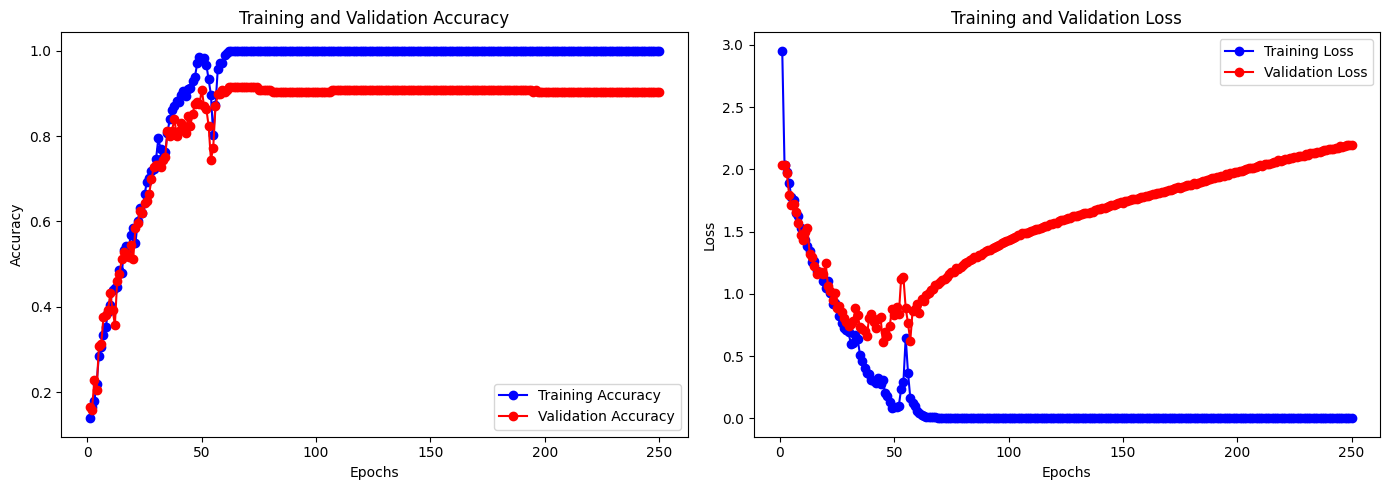

In [15]:
import matplotlib.pyplot as plt

# Assuming `history` is the output of model.fit() containing training logs
history_data = history.history

# Extract values for accuracy, validation accuracy, loss, and validation loss
accuracy = history_data.get('accuracy', [])
val_accuracy = history_data.get('val_accuracy', [])
loss = history_data.get('loss', [])
val_loss = history_data.get('val_loss', [])

epochs = range(1, len(accuracy) + 1)  # Epochs range for x-axis

# Print final metrics for reporting
print("Final Training Accuracy:", accuracy[-1] if accuracy else "N/A")
print("Final Validation Accuracy:", val_accuracy[-1] if val_accuracy else "N/A")
print("Final Training Loss:", loss[-1] if loss else "N/A")
print("Final Validation Loss:", val_loss[-1] if val_loss else "N/A")

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save metrics to a text file for reporting
with open("model_performance_report.txt", "w") as f:
    f.write("Model Performance Report\n")
    f.write("========================\n")
    f.write(f"Final Training Accuracy: {accuracy[-1] if accuracy else 'N/A'}\n")
    f.write(f"Final Validation Accuracy: {val_accuracy[-1] if val_accuracy else 'N/A'}\n")
    f.write(f"Final Training Loss: {loss[-1] if loss else 'N/A'}\n")
    f.write(f"Final Validation Loss: {val_loss[-1] if val_loss else 'N/A'}\n")


# Convert the Model to TensorFlow Lite Format

In [18]:
import tensorflow as tf


# Save the model
model.save('audio_classification_model.h5')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('audio_classification_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpauof_7k2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 219, 13), dtype=tf.float32, name='keras_tensor_158')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  138662751134368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662748978368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662748843952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662749420032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662749411408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662749412816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751228448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751239008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751236720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751237952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13866275123179

# Quantize the Model


In [19]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Save the quantized model
with open('audio_classification_model_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)

Saved artifact at '/tmp/tmp4hk9otkp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 219, 13), dtype=tf.float32, name='keras_tensor_158')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  138662751134368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662748978368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662748843952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662749420032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662749411408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662749412816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751228448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751239008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751236720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138662751237952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13866275123179